In [6]:
import sys
sys.path.append("./functions")

from utils import *
from model_bet import *
from layer import *

## We generate the ER graphs for this experiment

In [11]:
'''

This code generates different ER graphs for scalability test

'''


# Generating some Erdos-Renyi graphs for scalability tests

#nodes = [100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
nodes = [1000,2000,3000,4000,5000,6000,7000,8000,9000,10000]
edges = [2,4,6]

for n in nodes:
    for e in edges:
        list_bet_data = list()
        p = e/n

        print(f"Generating ER graph: {n} nodes, {e} avg edges")
        g_nx = nx.generators.random_graphs.fast_gnp_random_graph(n,p = p,directed = True)
        if nx.number_of_isolates(g_nx)>0:
            g_nx.remove_nodes_from(list(nx.isolates(g_nx)))
        g_nx = nx.convert_node_labels_to_integers(g_nx)
        g_nkit = nx2nkit(g_nx)
        bet_dict = {j:0 for j in g_nkit.iterNodes()} # We set the betweenness data to 0 sinnce we don't need it for this experiment
        deg_dict = {j:0 for j in g_nkit.iterNodes()} # the same
        list_bet_data.append([g_nx,bet_dict,deg_dict])

        fname_bet = f"./graphs/ER_1_graph_{n}_nodes_{e}_edges.pickle"

        with open(fname_bet,"wb") as fopen:
            pickle.dump(list_bet_data,fopen)

print("Finished")

Generating ER graph: 1000 nodes, 2 avg edges
Generating ER graph: 1000 nodes, 4 avg edges
Generating ER graph: 1000 nodes, 6 avg edges
Generating ER graph: 2000 nodes, 2 avg edges
Generating ER graph: 2000 nodes, 4 avg edges
Generating ER graph: 2000 nodes, 6 avg edges
Generating ER graph: 3000 nodes, 2 avg edges
Generating ER graph: 3000 nodes, 4 avg edges
Generating ER graph: 3000 nodes, 6 avg edges
Generating ER graph: 4000 nodes, 2 avg edges
Generating ER graph: 4000 nodes, 4 avg edges
Generating ER graph: 4000 nodes, 6 avg edges
Generating ER graph: 5000 nodes, 2 avg edges
Generating ER graph: 5000 nodes, 4 avg edges
Generating ER graph: 5000 nodes, 6 avg edges
Generating ER graph: 6000 nodes, 2 avg edges
Generating ER graph: 6000 nodes, 4 avg edges
Generating ER graph: 6000 nodes, 6 avg edges
Generating ER graph: 7000 nodes, 2 avg edges
Generating ER graph: 7000 nodes, 4 avg edges
Generating ER graph: 7000 nodes, 6 avg edges
Generating ER graph: 8000 nodes, 2 avg edges
Generating

##  Create datasets

In [12]:
param = {
    "nodes" : [1000,2000,3000,4000,5000,6000,7000,8000,9000,10000],#[100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000],
    "edges" : [2,4,6],
    "num_train" : 0,
    "num_test" : 1,
    "num_copies": [1],
    "split_seeds": [10],
}


for size in param["nodes"]:
    for edges in param["edges"]:
        for num_copies in param["num_copies"]:
            for splitseed in param["split_seeds"]:
        
                with open(f"./graphs/ER_1_graph_{size}_nodes_{edges}_edges.pickle","rb") as fopen:
                    list_data = pickle.load(fopen)

                num_graph = len(list_data)
                assert param["num_train"]+param["num_test"] == num_graph,"Required split size doesn't match number of graphs in pickle file."

                #For test split
                if param["num_test"] > 0:
                    random.seed(splitseed)
                    list_graph, list_n_sequence, list_node_num, cent_mat, deg_mat = create_dataset(list_data[param["num_train"]:param["num_train"]+param["num_test"]],num_copies = 1,adj_size=size)

                    with open(f"./data_splits/ER_1_graph_{size}_nodes_{edges}_edges.pickle","wb") as fopen:
                        pickle.dump([list_graph,list_n_sequence,list_node_num,cent_mat, deg_mat],fopen)


In [13]:
nodes = [100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
nodes = [1000,2000,3000,4000,5000,6000,7000,8000,9000,10000]
edges = [2,4,6]

results = []

for n in nodes:
    for e in edges:
        print(f"Processing graph {n} nodes and {e} edges.")
        file = f'ER_1_graph_{n}_nodes_{e}_edges.pickle'
        #Load data
        with open(f"./data_splits/{file}","rb") as fopen:
            list_graph_test,list_n_seq_test,list_num_node_test,bc_mat_test,deg_mat_test = pickle.load(fopen)

        model_size = bc_mat_test.shape[0]

        #Get adjacency matrices from graphs
        print(f"Graphs to adjacency conversion.")
        starting = time.time()
        list_adj_test,list_adj_t_test = graph_to_adj_bet(list_graph_test,list_n_seq_test,list_num_node_test,model_size)
        end = time.time()

        results.append({"n": n, "e": e, "t": round(end-starting,4)})
with open(f"./outputs/scalability_results.pickle","wb") as fopen:
            pickle.dump(results,fopen)

Processing graph 1000 nodes and 2 edges.
Graphs to adjacency conversion.
Processing 1 graphs...
Processing graph 1000 nodes and 4 edges.
Graphs to adjacency conversion.
Processing 1 graphs...
Processing graph 1000 nodes and 6 edges.
Graphs to adjacency conversion.
Processing 1 graphs...
Processing graph 2000 nodes and 2 edges.
Graphs to adjacency conversion.
Processing 1 graphs...
Processing graph 2000 nodes and 4 edges.
Graphs to adjacency conversion.
Processing 1 graphs...
Processing graph 2000 nodes and 6 edges.
Graphs to adjacency conversion.
Processing 1 graphs...
Processing graph 3000 nodes and 2 edges.
Graphs to adjacency conversion.
Processing 1 graphs...
Processing graph 3000 nodes and 4 edges.
Graphs to adjacency conversion.
Processing 1 graphs...
Processing graph 3000 nodes and 6 edges.
Graphs to adjacency conversion.
Processing 1 graphs...
Processing graph 4000 nodes and 2 edges.
Graphs to adjacency conversion.
Processing 1 graphs...
Processing graph 4000 nodes and 4 edges.

[[1000, 0.0307], [2000, 0.0481], [3000, 0.0742], [4000, 0.203], [5000, 0.2232], [6000, 0.1418], [7000, 0.2841], [8000, 0.3136], [9000, 0.3185], [10000, 0.4822]]
[[1000, 0.0411], [2000, 0.0794], [3000, 0.2295], [4000, 0.2572], [5000, 0.309], [6000, 0.3596], [7000, 0.3933], [8000, 0.4474], [9000, 0.476], [10000, 0.5137]]
[[1000, 0.1477], [2000, 0.223], [3000, 0.1709], [4000, 0.3283], [5000, 0.3948], [6000, 0.4509], [7000, 0.5139], [8000, 0.6922], [9000, 0.7574], [10000, 0.8274]]


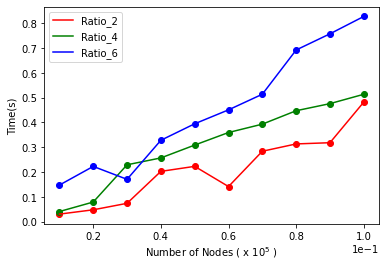

In [14]:
import matplotlib.pyplot as plt

with open(f"./outputs/scalability_results.pickle","rb") as fopen:
    results = pickle.load(fopen)

line_2 = []
line_4 = []
line_6 = []
xs = []

for j in results:
    if j["e"] == 2:
        line_2.append([j['n'],j['t']])
    elif j["e"] == 4:
        line_4.append([j['n'],j['t']])
    else:
        line_6.append([j['n'],j['t']])

print(line_2)
print(line_4)
print(line_6)


xs = [j[0]/100000 for j in line_2]
ys = [j[1] for j in line_2]
plt.plot(xs,ys,color='r',label='Ratio_2')
plt.scatter(xs,ys,color='r')

xs = [j[0]/100000 for j in line_4]
ys = [j[1] for j in line_4]
plt.plot(xs,ys,color='g',label='Ratio_4')
plt.scatter(xs,ys,color='g')

xs = [j[0]/100000 for j in line_6]
ys = [j[1] for j in line_6]
plt.plot(xs,ys,color='b',label='Ratio_6')
plt.scatter(xs,ys,color='b')

plt.legend()
plt.ticklabel_format(axis='x',scilimits=(0,10))
plt.xlabel("Number of Nodes ( x 10$^5$ )")
plt.ylabel("Time(s)")
#plt.savefig("plots/exp-3-scalability.png",dpi=150)
plt.show()